In [72]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt


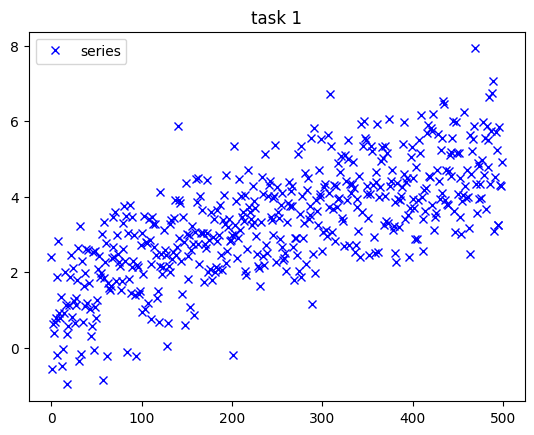

In [77]:
#task 1
N = 500
h = 0.05

def model_series():
    return np.array([np.sqrt(k*h) + np.random.normal() for k in range(N)])
def model_trend_series():
    return np.array([np.sqrt(k*h) for k in range(N)])

series = model_series()

plt.figure()
plt.title("task 1")
plt.plot(series,'x', color = 'blue', label = "series",)
plt.legend()
plt.show()

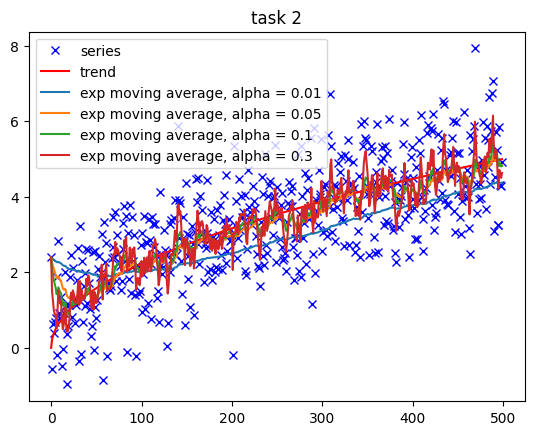

In [78]:
def exp_moving_average(series:np.array, alpha:float):
    res = []
    res.append(series[0])
    for i in range(1, series.size):
        res.append(alpha * series[i] + (1 - alpha) * res[i - 1])
    return res


ema001 = exp_moving_average(series, 0.01)
ema005 = exp_moving_average(series, 0.05)
ema01 = exp_moving_average(series, 0.1)
ema03 = exp_moving_average(series, 0.3)

plt.figure()
plt.title("task 2")
plt.plot(series, 'x', color = 'blue', label = "series")
plt.plot(trend, color ='red', label = "trend")
plt.plot(ema001, label = "exp moving average, alpha = 0.01")
plt.plot(ema005, label = "exp moving average, alpha = 0.05")
plt.plot(ema01, label = "exp moving average, alpha = 0.1")
plt.plot(ema03, label = "exp moving average, alpha = 0.3")
plt.legend()

plt.legend()
plt.show()

freq max:  0.0


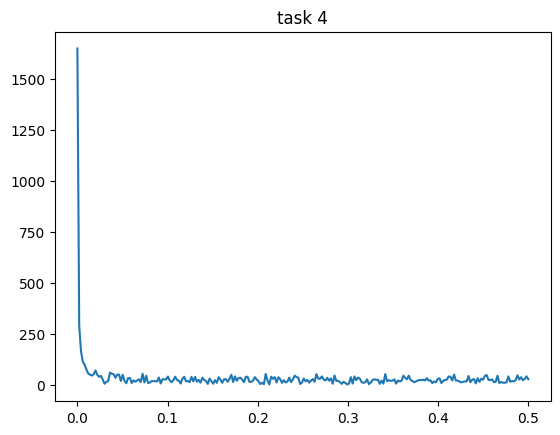

In [82]:
#task 4
f = np.fft.fft(series)
f = np.abs(f[:len(series) // 2])
freqs = np.linspace(0, 1 / (2.0), len(series) // 2)
freq = freqs[np.argmax(f)]
plt.figure()
plt.title("task 4")
plt.plot(freqs, f, label='series')
print('freq max: ', freq)

In [84]:
#task 5
def rotation_points(series:np.array):
    res = []
    for i in range(1, len(series) - 2):
        if (series[i] > series[i - 1] and series[i] > series[i + 1]) or (series[i] < series[i - 1] and series[i] < series[i + 1]):
            res.append(series[i])
    return res


def kendall(series:np.array, trend:np.array):
    tail = series - trend
    r_p = rotation_points(tail)
    p_e = (2.0 / 3.0) * (len(series) - 2)
    p_d = (16 * len(series) - 29) / 90.0
    p_c = len(r_p)
    
    print('rotation points count: ', p_c)
    print('Kendall coefficient: ', (4 * p_c) / (N * (N - 1)) - 1)

    if p_c < p_e + p_d and p_c > p_e - p_d:
        print("random\n")
    elif p_c > p_e + p_d:
        print("rapidly oscillating\n")
    elif p_c < p_e - p_d:
        print("positively correlated\n")


print("kendall exp 0.01")
kendall(series, ema001)
print("kendall exp 0.05")
kendall(series, ema005)
print("kendall exp 0.1")
kendall(series, ema01)
print("kendall exp 0.3")
kendall(series, ema03)


kendall exp 0.01
rotation points count:  334
Kendall coefficient:  -0.9946452905811624
random

kendall exp 0.05
rotation points count:  330
Kendall coefficient:  -0.9947094188376754
random

kendall exp 0.1
rotation points count:  330
Kendall coefficient:  -0.9947094188376754
random

kendall exp 0.3
rotation points count:  326
Kendall coefficient:  -0.9947735470941884
random

